# Task 2- Stock Market Prediction and Forecasting using Stacked LSTM

### Name- Vaibhavi Sujit Dhumal

In [30]:
!pip install tensorflow

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#!pip install tensorflow

import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [3]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [4]:
df['Date'] = pd.to_datetime(df["Date"])    # converts string date into datetime

In [5]:
df = df.sort_values("Date")

In [6]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [7]:
df.reset_index(inplace=True)

In [8]:
df.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


## Visualizing the data

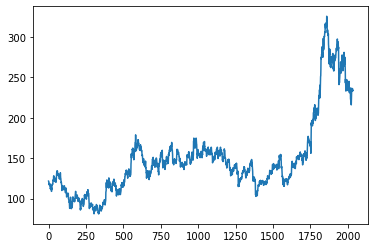

In [9]:
plt.plot(df['Close'])

In [10]:
df_close = df['Close']
df_close

0       121.55
1       120.90
2       120.65
3       117.60
4       118.65
         ...  
2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, Length: 2035, dtype: float64

In [11]:
# MinMaxScaler to scale the attributes

scaler = MinMaxScaler(feature_range=(0,1))

In [12]:
df_close = scaler.fit_transform(np.array(df_close).reshape(-1,1))
df_close

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

## Training and spliting the data

In [13]:
training_size = int(len(df_close)*0.70)
test_size = len(df_close)-training_size
train, test = df_close[0:training_size,:], df_close[training_size: len(df_close),:1]

In [14]:
def create_mat(ds, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(ds)-time_step-1):
        a = ds[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(ds[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [15]:
time_step = 100
X_train, y_train = create_mat(train, time_step)
X_test, y_test = create_mat(test, time_step)

In [16]:
X_train.shape

(1323, 100)

In [17]:
y_train.shape

(1323,)

In [18]:
X_test.shape

(510, 100)

In [19]:
y_test.shape

(510,)

In [20]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

## LSTM model

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [22]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.fit(X_train, y_train, validation_split=0.1, epochs= 60, batch_size=64, verbose = 1)

Epoch 1/60
19/19 [==============================] - 18s 398ms/step - loss: 0.0102 - val_loss: 0.0020
Epoch 2/60
19/19 [==============================] - 4s 237ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 3/60
19/19 [==============================] - 5s 249ms/step - loss: 9.7083e-04 - val_loss: 0.0012
Epoch 4/60
19/19 [==============================] - 5s 245ms/step - loss: 8.5027e-04 - val_loss: 0.0011
Epoch 5/60
19/19 [==============================] - 5s 245ms/step - loss: 8.0965e-04 - val_loss: 0.0011
Epoch 6/60
19/19 [==============================] - 5s 246ms/step - loss: 7.8578e-04 - val_loss: 0.0011
Epoch 7/60
19/19 [==============================] - 5s 246ms/step - loss: 7.6994e-04 - val_loss: 0.0010
Epoch 8/60
19/19 [==============================] - 5s 246ms/step - loss: 7.6551e-04 - val_loss: 9.8933e-04
Epoch 9/60
19/19 [==============================] - 5s 247ms/step - loss: 7.5140e-04 - val_loss: 9.6885e-04
Epoch 10/60
19/19 [==============================] - 5s 247ms/s

In [24]:
## Predicting the result



In [25]:
predictions = model.predict(X_test)

In [26]:
inv_predictions = scaler.inverse_transform(predictions)

In [27]:
inv_predictions

array([[141.68716 ],
       [142.02554 ],
       [141.57077 ],
       [139.6795  ],
       [137.9454  ],
       [136.84644 ],
       [137.09747 ],
       [138.13312 ],
       [138.82593 ],
       [139.03094 ],
       [139.10747 ],
       [139.965   ],
       [140.72229 ],
       [142.02612 ],
       [143.89984 ],
       [143.20314 ],
       [141.51143 ],
       [140.59459 ],
       [140.42209 ],
       [143.48833 ],
       [147.29552 ],
       [150.25586 ],
       [151.84906 ],
       [151.21176 ],
       [150.82501 ],
       [150.20625 ],
       [149.98859 ],
       [150.838   ],
       [151.53058 ],
       [151.86641 ],
       [152.34819 ],
       [151.79614 ],
       [149.54341 ],
       [145.06055 ],
       [141.22714 ],
       [139.00964 ],
       [138.1687  ],
       [137.40508 ],
       [135.90953 ],
       [133.30537 ],
       [130.9768  ],
       [129.39629 ],
       [127.43035 ],
       [126.2625  ],
       [124.51898 ],
       [122.299995],
       [121.1382  ],
       [120.4

In [28]:
## Mean squared error

import math
from sklearn.metrics import mean_squared_error

In [29]:
mse = math.sqrt(mean_squared_error(y_test, predictions))
print("The Mean Squared Error for above model is: ", mse)

The Mean Squared Error for above model is:  0.04015485380297541
